In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
from cartopy import crs as ccrs

# NOTE: The Shapely GEOS version (3.7.1-CAPI-1.11.1 27a5e771) is incompatible with the GEOS version 
# PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Expect Warning, but no negative performance effects 
# in this notebook

/usr/local/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.7.1-CAPI-1.11.1 27a5e771) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


<AxesSubplot:>

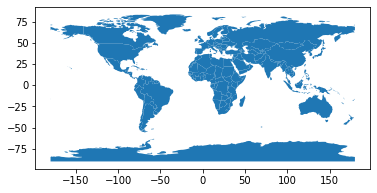

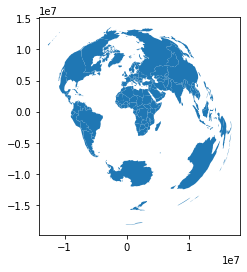

In [2]:
# Example 1, 1.1 Geopandas Docs
# https://geopandas.org/gallery/cartopy_convert.html

path = gpd.datasets.get_path('naturalearth_lowres')
df = gpd.read_file(path)

df.plot()

# Define the CartoPy CRS object.
crs = ccrs.AzimuthalEquidistant()

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init
df_ae = df.to_crs(crs_proj4)

# Here's what the plot looks like in GeoPandas
df_ae.plot()

<AxesSubplot:>

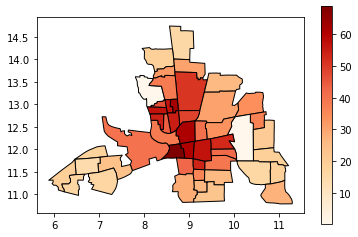

In [3]:
# Example 2, Testing libpysal
# https://geopandas.org/gallery/choropleths.html#Choropleth-classification-schemes-from-PySAL-for-use-with-GeoPandas
import libpysal as ps

pth = ps.examples.get_path("columbus.shp")
tracts = gpd.GeoDataFrame.from_file(pth)

tracts.plot(
    column='CRIME', cmap='OrRd', edgecolor='k', legend=True
)

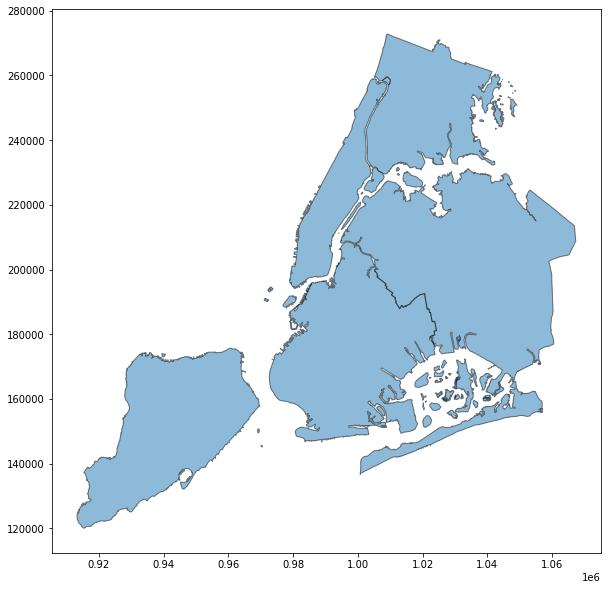

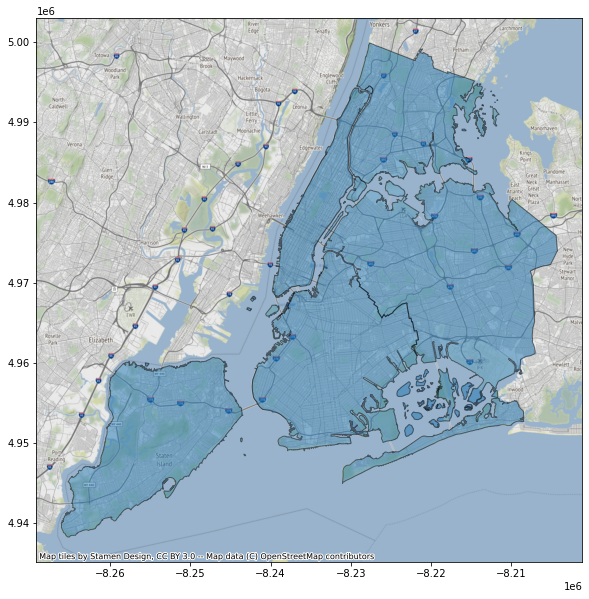

In [4]:
# Example 3, Testing Contextily 
# https://geopandas.org/gallery/plotting_basemap_background.html#Adding-a-background-map-to-plots

import contextily as ctx

df = gpd.read_file(gpd.datasets.get_path('nybb'))
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

df = df.to_crs(epsg=3857)

ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, zoom=12)

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<GeoAxesSubplot:>

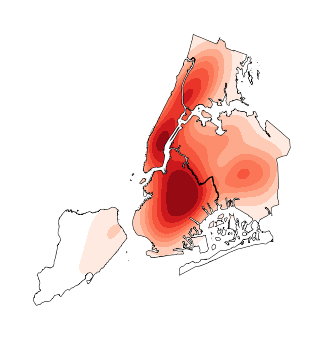

In [5]:
# Example 4, Testing GeoPlot Heatmaps
# https://geopandas.org/gallery/plotting_with_geoplot.html#Plotting-with-Geoplot

import geoplot

collisions = gpd.read_file(
    geoplot.datasets.get_path('nyc_injurious_collisions')
)

boroughs = gpd.read_file(
    geoplot.datasets.get_path('nyc_boroughs')
)

ax = geoplot.kdeplot(
    collisions.head(1000), clip=boroughs.geometry,
    shade=True, cmap='Reds',
    projection=geoplot.crs.AlbersEqualArea()
)

geoplot.polyplot(boroughs, ax=ax, zorder=1)

In [6]:
# Example 5, Testing Folium
# Geopandas Docs: https://geopandas.org/gallery/plotting_with_folium.html

import folium
from folium import plugins

slippy_map = folium.Map(
    location = [40.40, -80.110],
    tiles = "OpenStreetMap",
    zoom_start = 9
)

slippy_map